# Análisis de Tweets

En ese notebook se van a analizar los csvs que contienen información de los tweets recolectados. Dentro de la carpeta `data/` se encuentran los archivos `tweets_junio.csv` y `tweets_agosto.csv`, que contienen los tweets relacionados con el tratamiento de Diputados y de Senadores, respectivamente. 

En el proceso de descarga de los tweets, Twitter provee mucha información sobre cada tweet en un formato `JSON`. Esta información fue preprocesada, comprimida y llevada a una tabla de datos `csv`.

En ambos casos, las columnas que tiene la tabla de datos son las siguientes:


|    Columnas   |  Descripción  |
| ------------- | ------------- |
| `id` | ID del tweets | 
| `created_at` | Fecha de creación del tweets | 
| `favorite_count` | Cantidad de favoritos que tiene el tweet | 
| `retweet_count` | Cantidad de retweet del tweet | 
| `full_text` | Texto completo del tweet | 
| `posicion` | Posición que se tiene con respecto al aborto de acuerdo a *hashtags* usados. | 
| `favorited` | Si el tweet recibió algún like | 
| `retweeted` | Si el tweet recibió algún retweet | 
| `user_name` | *username* de la cuenta que realiza el tweet | 
| `user_id` | ID de la cuenta que realiza el tweet | 
| `original_id` | En el caso de que el tweet sea un retweet, te da el id del tweet. Si no, coincide con el `id` | 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Diputades (junio/2018)

In [2]:
df_tweets_junio =  pd.read_csv('data/tweets_junio.csv', parse_dates=['created_at'])

In [3]:
df_tweets_junio.sample(3)

,id,created_at,favorite_count,retweet_count,full_text,posicion,favorited,retweeted,user_name,user_id,original_id
191294,1006577655783874566,2018-06-12 16:43:09+00:00,0,0,@FlorHalfon Me parece mas loable como llegó el...,si,False,False,Cristian Saiz,785822262494629888,1006577655783874566
708356,1007336649594933250,2018-06-14 18:59:07+00:00,0,31,RT @tenemosdemocrax: Mi postura frente al abor...,si,False,False,José E. Correa,1000763719880794112,1007336649594933250
115342,1006211226559500288,2018-06-11 16:27:05+00:00,0,381,RT @actrices_arg: Las @actrices_arg somos un g...,si,False,False,DIEGO TARRAGONA,408225991,1006211226559500288


In [4]:
len(df_tweets_junio)

1041585

Podemos ver que para el mes de Junio (tratamiento en Diputados) se cuenta con un poco más de un millon de tweets .

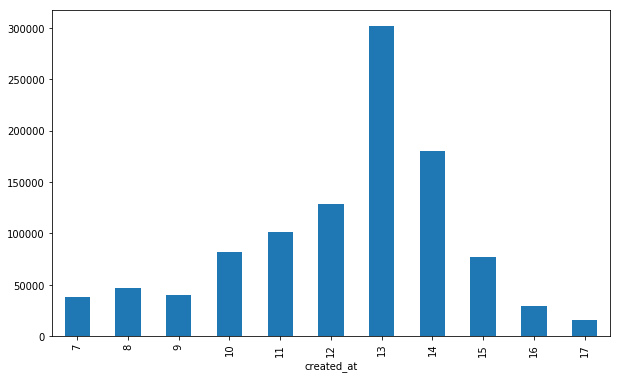

In [7]:
df_tweets_junio["created_at"].groupby(df_tweets_junio["created_at"].dt.day).count().plot(kind="bar")
plt.show()

En este gráfico podemos ver los días en los que se twitteo, y como hay muchos tweets más en el día de la sesión (el 13 de Junio) y un día despues que fue cuando terminó la sesión. 

## Senadores (agosto/2018)

In [8]:
df_tweets_agosto =  pd.read_csv('data/tweets_agosto.csv', parse_dates=['created_at'])

In [9]:
df_tweets_agosto.sample(3)

,id,created_at,favorite_count,retweet_count,text,favorited,retweeted,user_name,user_id,original_id
115372,1025415937464389632,2018-08-03 16:19:45+00:00,0,0,RT @PatoBullrich: Esta son los resultados de l...,False,False,Nano #PeronismoCáncerPolítico 🇦🇷,71080518,1025415937464389632
107126,1025408559553687552,2018-08-03 15:50:26+00:00,0,0,RT @Gracemazzola: ⚠️Muy buena noticia: cosecha...,False,False,#CiberTropaMachirula💪💪💪,2441415280,1025408559553687552
58327,1025346636770361344,2018-08-03 11:44:22+00:00,0,0,Lo sigo! Y me sumo a las radicales que esperam...,False,False,Andrea Triolo💚,721397475802816513,1025346636770361344


In [10]:
len(df_tweets_agosto)

120902

Para la sesión de Senadores, se cuenta con al rededor de 120k de tweets.

In [11]:
df_tweets_agosto["created_at"].min(), df_tweets_agosto["created_at"].min()

(Timestamp('2018-08-03 00:47:52+0000', tz='UTC'),
 Timestamp('2018-08-03 00:47:52+0000', tz='UTC'))

La gran cantidad de tweets menos se explica en que para este caso se recolectaron datos solamente el día de la sesión, y no antes y después.